In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# from pandas.conftest import axis_1
from rich.pretty import Pretty
from sigpyproc.readers import FilReader

In [7]:
myFil_blank_sky = FilReader('./data/blank_sky.fil')
myFil_calibrator_source = FilReader('./data/calibrator_source.fil')

In [8]:
# myFil_blank_sky
myFil_calibrator_source

In [9]:
Pretty(myFil_blank_sky.header)

Header(
    filename='./data/blank_sky.fil',
    data_type='filterbank',
    nchans=1024,
    foff=-0.390625,
    fch1=800.0,
    nbits=32,
    tsamp=0.00032768,
    tstart=60638.34381999473,
    nsamples=30518,
    nifs=1,
    coord=<SkyCoord (ICRS): (ra, dec) in deg
    (68.75000238, 45.02999878)>,
    azimuth=<Angle 0. deg>,
    zenith=<Angle 0. deg>,
    telescope='CHIME',
    backend='CHIME',
    source='Fake',
    frame='topocentric',
    ibeam=1,
    nbeams=1,
    dm=0.0,
    period=0,
    accel=0,
    signed=0,
    rawdatafile='test.dat',
    stream_info=StreamInfo(
        entries=[
            FileInfo(
                filename='./data/blank_sky.fil',
                hdrlen=414,
                datalen=125001728,
                nsamples=30518,
                tstart=60638.34381999473,
                tsamp=0.00032768
            )
        ]
    )
)

In [10]:
Pretty(myFil_calibrator_source.header)

Header(
    filename='./data/calibrator_source.fil',
    data_type='filterbank',
    nchans=1024,
    foff=-0.390625,
    fch1=800.0,
    nbits=32,
    tsamp=0.00032768,
    tstart=60638.353596809546,
    nsamples=30518,
    nifs=1,
    coord=<SkyCoord (ICRS): (ra, dec) in deg
    (72.26000547, 45.02999878)>,
    azimuth=<Angle 0. deg>,
    zenith=<Angle 0. deg>,
    telescope='CHIME',
    backend='CHIME',
    source='Fake',
    frame='topocentric',
    ibeam=1,
    nbeams=1,
    dm=0.0,
    period=0,
    accel=0,
    signed=0,
    rawdatafile='test.dat',
    stream_info=StreamInfo(
        entries=[
            FileInfo(
                filename='./data/calibrator_source.fil',
                hdrlen=414,
                datalen=125001728,
                nsamples=30518,
                tstart=60638.353596809546,
                tsamp=0.00032768
            )
        ]
    )
)

In [11]:
import sigpyproc
print(sigpyproc.__version__)
print(dir(sigpyproc))


1.2.0
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'base', 'block', 'core', 'foldedcube', 'fourierseries', 'header', 'io', 'metadata', 'params', 'readers', 'timeseries', 'utils']


### We could plot a waterfall plot (dynamic spectrum) to get a sense for what the data looks like.

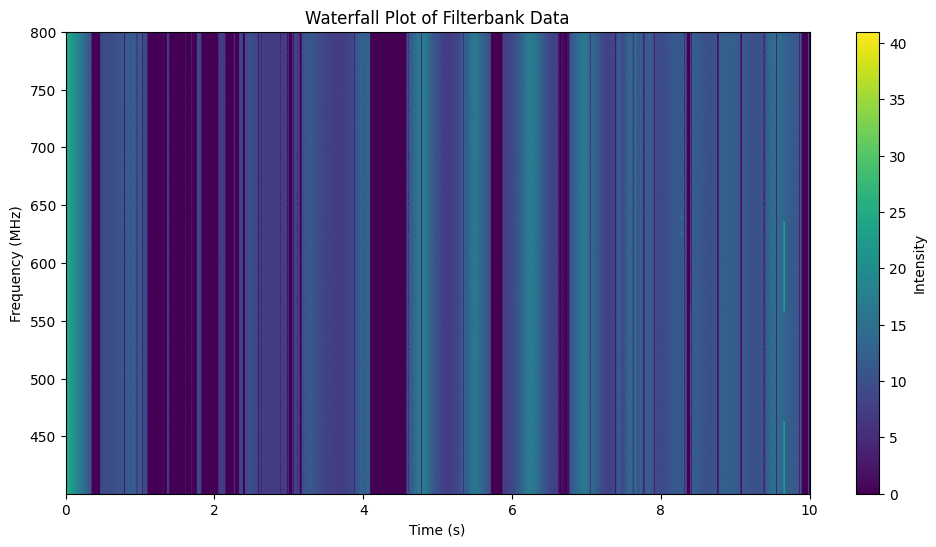

In [12]:
# Specify your filterbank file
# filename = './data/blank_sky.fil'
filename = '../data/calibrator_source.fil'
fil = FilReader(filename)

# Read all samples (or choose a subset)
n_samples = fil.header.nsamples
fb = fil.read_block(0, n_samples)  # fb is a FilterbankBlock object

# Extract the underlying NumPy array
if hasattr(fb, 'data'):
    data_array = fb.data
else:
    data_array = np.array(fb)

# Compute frequency axis using header info
nchans = fil.header.nchans
fch1 = fil.header.fch1
foff = fil.header.foff
freqs = fch1 + np.arange(nchans) * foff

# Create a waterfall (dynamic spectrum) plot
plt.figure(figsize=(12, 6))
plt.imshow(data_array.T, aspect='auto', origin='lower',
           extent=[0, n_samples * fil.header.tsamp, freqs[-1], freqs[0]])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (MHz)')
plt.title('Waterfall Plot of Filterbank Data')
plt.colorbar(label='Intensity')
plt.show()


### Though, we could also perform some noise statistics and time series analysis

#### Time series

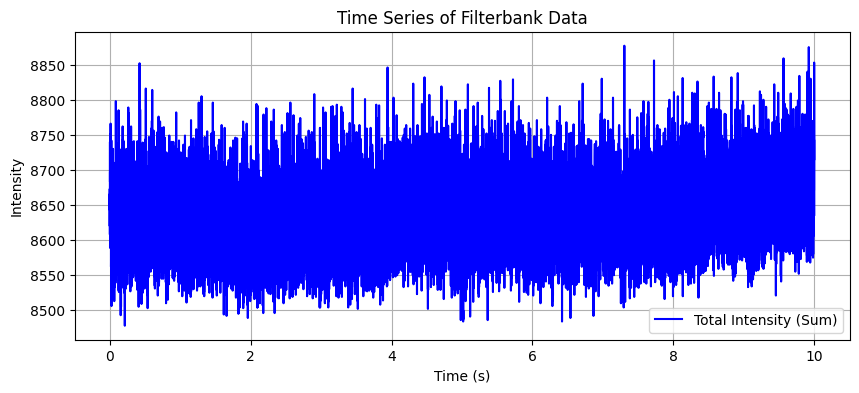

In [13]:
time_axis = np.arange(n_samples) * fil.header.tsamp

time_series_sum = data_array.sum(axis=0)
time_series_avg = data_array.mean(axis=0)

plt.figure(figsize=(10,4))
plt.plot(time_axis, time_series_sum, label='Total Intensity (Sum)', color='blue')
# plt.plot(time_axis, time_series_avg, label='Mean Intensity (Average)', color='red', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Intensity')
plt.title('Time Series of Filterbank Data')
plt.legend()
plt.grid(True)
plt.show()

#### Noise Analysis

Mean Intensity (Sum over freq): 8631.195
Standard Deviation: 49.536007


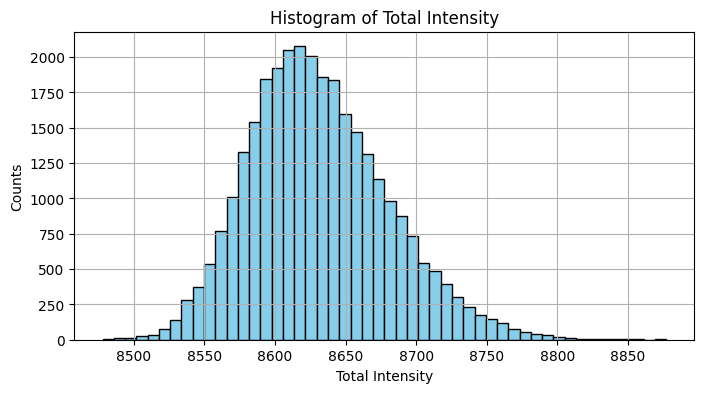

In [14]:
mean_intensity = np.mean(time_series_sum)
std_intensity = np.std(time_series_sum)

print("Mean Intensity (Sum over freq):", mean_intensity)
print("Standard Deviation:", std_intensity)

# Plot a histogram of the total intensity to visualize the noise distribution
plt.figure(figsize=(8, 4))
plt.hist(time_series_sum, bins=50, color='skyblue', edgecolor='k')
plt.xlabel('Total Intensity')
plt.ylabel('Counts')
plt.title('Histogram of Total Intensity')
plt.grid(True)
plt.show()